In [1]:
import sys, os
sys.path.append(os.path.realpath('../'))
import itertools


import pandas as pd
import numpy as np
import collections

import matplotlib.pyplot as plt
plt.style.use("ggplot")


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
raw_data = pd.read_csv('../dataset/bo3.csv', encoding='utf-8-sig',converters={'routes':eval}).drop(columns=['regions'])
raw_data

,vehicle_id,p_start,p_temp,p_end,routes
0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Thảo Điền]"
1,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8014)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Đướng Song Hành X..."
2,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73700000000001, 10.8012)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Đướng Song Hành X..."
3,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8022)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Nguyễn Bá Lân]"
4,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8027)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Nguyễn Bá Lân]"
...,...,...,...,...,...
7276495,100000533,"(106.679, 10.8486)","(106.679, 10.8515)","(106.679, 10.8532)","[Đường Nguyễn Oanh, Hà Huy Giáp, Hà Huy Giáp]"
7276496,100000533,"(106.679, 10.8488)","(106.679, 10.8502)","(106.679, 10.8515)","[Đường Nguyễn Oanh, Đường Nguyễn Oanh, Hà Huy ..."
7276497,100000533,"(106.679, 10.8488)","(106.679, 10.8502)","(106.679, 10.8532)","[Đường Nguyễn Oanh, Đường Nguyễn Oanh, Hà Huy ..."
7276498,100000533,"(106.679, 10.8488)","(106.679, 10.8515)","(106.679, 10.8532)","[Đường Nguyễn Oanh, Hà Huy Giáp, Hà Huy Giáp]"


In [3]:
raw_data.shape

(7276500, 5)

In [4]:
import re

def preprocess_street(streets):
    res = []

    def rm_duong(txt):
        txt = re.sub(r'\b(\w*đường\w*)\b', '', txt).strip()
        txt = re.sub(r'\b(\w*đướng\w*)\b', '', txt).strip()
        txt = re.sub(r'\b(\w*dủổng\w*)\b', '', txt).strip()
        return txt.strip()

    def normalize_street(txt):
        txt = re.sub(r'ð', 'đ', txt).strip()
        txt = re.sub(r'cmt8', 'cách_mạng_tháng_8', txt).strip()
        txt = re.sub(r'cách mạng tháng tám', 'cách_mạng_tháng_8', txt).strip()
        txt = re.sub(r'ba tháng hai', '3_tháng_2', txt).strip()
        txt = re.sub(r'3/2', '3_tháng_2', txt).strip()
        return txt.strip()

    def rpl_space_to_underscore(txt):
        return txt.replace(" ", "_")

    for street in streets:
        try:
            street = street.lower()
            t = rm_duong(street)
            t = normalize_street(t)
            t = rpl_space_to_underscore(t)
            res.append(t)
        except Exception as e:
            print(e)

#     return ' '.join(res)
    return res

In [5]:
streets = raw_data['routes'].tolist()
items = [preprocess_street(street) for street in streets]
items[:4]

[['xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền'],
 ['xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'song_hành_xa_lộ_hà_nội'],
 ['xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'song_hành_xa_lộ_hà_nội'],
 ['xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nguyễn_bá_lân']]

In [13]:
tuple_street = [tuple(item) for item in items]
street_counts = collections.Counter(tuple_street)
street_counts.most_common(20)

[(('quốc_lộ_1', 'quốc_lộ_1', 'quốc_lộ_1'), 150781),
 (('võ_văn_kiệt', 'võ_văn_kiệt', 'võ_văn_kiệt'), 149270),
 (('võ_trần_chí', 'quốc_lộ_1', 'quốc_lộ_1'), 127266),
 (('nguyễn_văn_linh', 'nguyễn_văn_linh', 'nguyễn_văn_linh'), 79391),
 (('kinh_dương_vương', 'kinh_dương_vương', 'hồng_bàng'), 72667),
 (('võ_trần_chí', 'võ_trần_chí', 'quốc_lộ_1'), 56410),
 (('kinh_dương_vương', 'hồng_bàng', 'hồng_bàng'), 47789),
 (('mai_chí_thọ', 'võ_văn_kiệt', 'võ_văn_kiệt'), 46816),
 (('kinh_dương_vương', 'kinh_dương_vương', 'kinh_dương_vương'), 45989),
 (('nguyễn_văn_linh', 'nguyễn_văn_linh', 'nguyễn_lương_bằng'), 42211),
 (('nguyễn_văn_linh', 'nguyễn_lương_bằng', 'nguyễn_lương_bằng'), 38704),
 (('nguyễn_văn_linh', 'nguyễn_văn_linh', 'cầu_phú_mỹ'), 31413),
 (('nguyễn_văn_linh', 'cầu_phú_mỹ', 'nguyễn_văn_linh'), 30525),
 (('quốc_lộ_22', 'quốc_lộ_1', 'quốc_lộ_1'), 26533),
 (('võ_văn_kiệt', 'võ_văn_kiệt', 'nguyễn_thái_học'), 23652),
 (('võ_văn_kiệt', 'võ_văn_kiệt', 'phạm_ngũ_lão'), 23652),
 (('võ_văn_kiệt',

In [15]:
df = pd.DataFrame(street_counts.most_common(),columns=['feature', 'count'])
df.head(20)

,feature,count
0,"(quốc_lộ_1, quốc_lộ_1, quốc_lộ_1)",150781
1,"(võ_văn_kiệt, võ_văn_kiệt, võ_văn_kiệt)",149270
2,"(võ_trần_chí, quốc_lộ_1, quốc_lộ_1)",127266
3,"(nguyễn_văn_linh, nguyễn_văn_linh, nguyễn_văn_...",79391
4,"(kinh_dương_vương, kinh_dương_vương, hồng_bàng)",72667
5,"(võ_trần_chí, võ_trần_chí, quốc_lộ_1)",56410
6,"(kinh_dương_vương, hồng_bàng, hồng_bàng)",47789
7,"(mai_chí_thọ, võ_văn_kiệt, võ_văn_kiệt)",46816
8,"(kinh_dương_vương, kinh_dương_vương, kinh_dươn...",45989
9,"(nguyễn_văn_linh, nguyễn_văn_linh, nguyễn_lươn...",42211


In [8]:
df['count'].describe()

count     85466.000000
mean         85.139120
std        1114.167649
min           1.000000
25%           4.000000
50%          11.000000
75%          35.000000
max      150781.000000
Name: count, dtype: float64

In [9]:
df.sort_values(by=['count'], ascending=False)

,feature,count
0,"(quốc_lộ_1, quốc_lộ_1, quốc_lộ_1)",150781
1,"(võ_văn_kiệt, võ_văn_kiệt, võ_văn_kiệt)",149270
2,"(võ_trần_chí, quốc_lộ_1, quốc_lộ_1)",127266
3,"(nguyễn_văn_linh, nguyễn_văn_linh, nguyễn_văn_...",79391
4,"(kinh_dương_vương, kinh_dương_vương, hồng_bàng)",72667
...,...,...
80482,"(hẻm_687_kinh_dương_vương, vòng_xoay_mũi_tàu, ...",1
80481,"(hẻm_687_kinh_dương_vương, vòng_xoay_mũi_tàu, ...",1
80480,"(hẻm_687_kinh_dương_vương, vòng_xoay_mũi_tàu, ...",1
80479,"(hẻm_687_kinh_dương_vương, vòng_xoay_mũi_tàu, ...",1


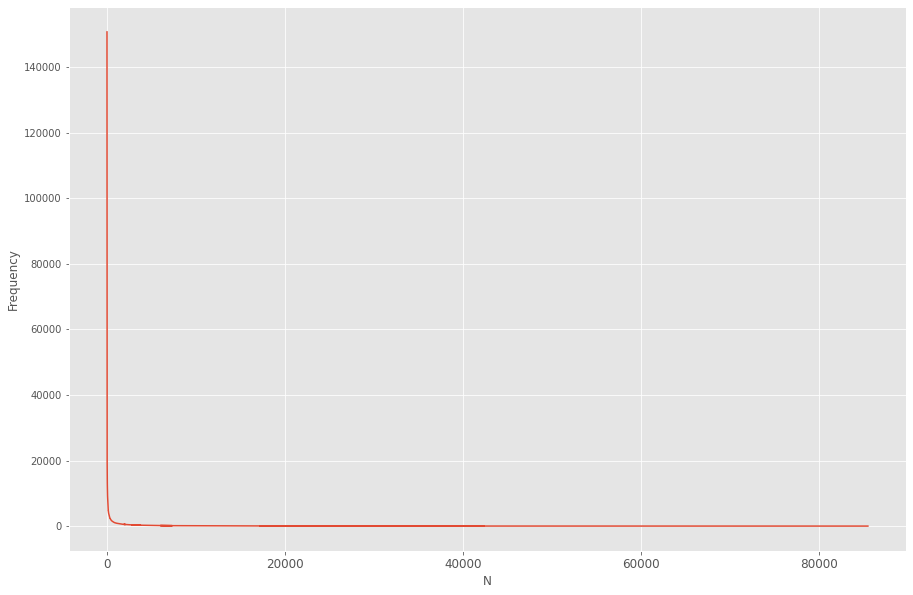

In [32]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['xtick.labelsize'] = 12
df.sort_values(by=['count'],ascending=False).plot(legend=None)
# plt.plot(300000,250/2)
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

In [11]:
max(df['count'].values), min(df['count'].values), df['count'].values.mean(), np.median(df['count'].unique())

(150781, 1, 85.13911964991927, 879.5)

In [12]:
df['count'].unique()

array([150781, 149270, 127266, ...,      3,      2,      1], dtype=int64)

In [18]:
uni = df['count'].unique()
hist = {}
for i in uni:
    hist.update({i:len(df[df['count']==i])})

In [19]:
# pd.DataFrame.from_dict(hist, columns=['count','frequency'])
freq_count = pd.DataFrame.from_dict(hist, orient='index',columns=['frequency'])
freq_count

,frequency
150781,1
149270,1
127266,1
79391,1
72667,1
...,...
5,2772
4,4977
3,6410
2,5927


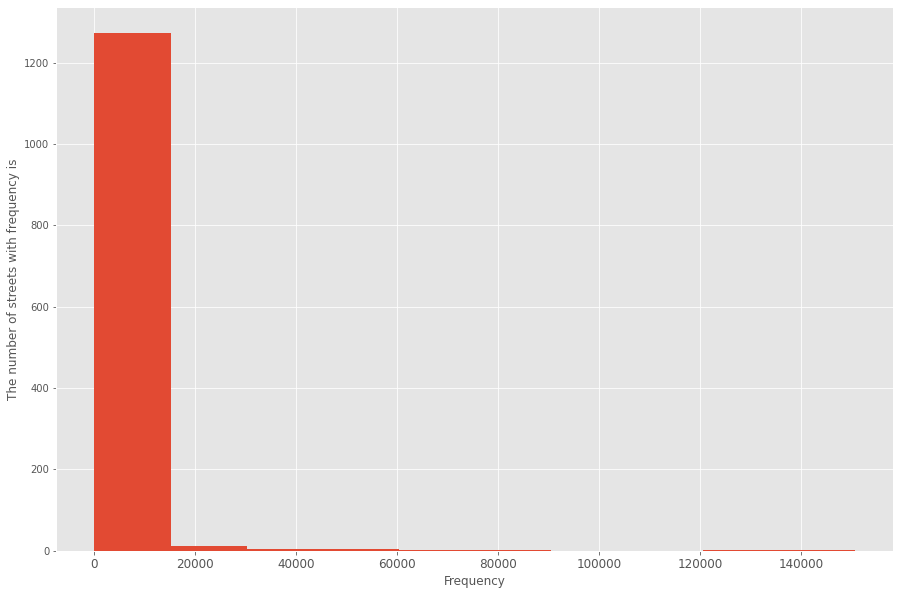

In [20]:
plt.hist(hist)
plt.xlabel('Frequency')
plt.ylabel('The number of streets with frequency is')
plt.show()

In [21]:
df[df['count']==1]

,feature,count
77997,"(xa_lộ_hà_nội, xa_lộ_hà_nội, tây_thạnh)",1
77998,"(thảo_điền, song_hành_xa_lộ_hà_nội, song_hành_...",1
77999,"(thảo_điền, nguyễn_bá_lân, nguyễn_bá_lân)",1
78000,"(thảo_điền, số_39, trần_não)",1
78001,"(thảo_điền, số_39, ngã_tư_hàng_xanh)",1
...,...,...
85461,"(hẻm_35_phạm_ngũ_lão, pham_ngũ_lão, pham_ngũ_lão)",1
85462,"(hẻm_35_phạm_ngũ_lão, quang_trung, quang_trung)",1
85463,"(hẻm_35_phạm_ngũ_lão, hà_huy_giáp, hà_huy_giáp)",1
85464,"(quang_trung, quang_trung, hẻm_309_nguyễn_oanh)",1


In [22]:
df[df['count']>300]

,feature,count
0,"(quốc_lộ_1, quốc_lộ_1, quốc_lộ_1)",150781
1,"(võ_văn_kiệt, võ_văn_kiệt, võ_văn_kiệt)",149270
2,"(võ_trần_chí, quốc_lộ_1, quốc_lộ_1)",127266
3,"(nguyễn_văn_linh, nguyễn_văn_linh, nguyễn_văn_...",79391
4,"(kinh_dương_vương, kinh_dương_vương, hồng_bàng)",72667
...,...,...
3421,"(empty, tạ_quang_bửu, cầu_chữ_y)",303
3422,"(trần_thị_ngôi, phạm_nhữ_tăng, phạm_nhữ_tăng)",302
3423,"(phạm_nhữ_tăng, empty, tạ_quang_bửu)",302
3424,"(hẻm_c7_phạm_hùng, tạ_quang_bửu, lê_lợi)",302


In [23]:
freq_count.tail(50)

,frequency
50,301
49,53
48,808
47,13
46,91
45,651
44,294
43,26
42,767
41,19


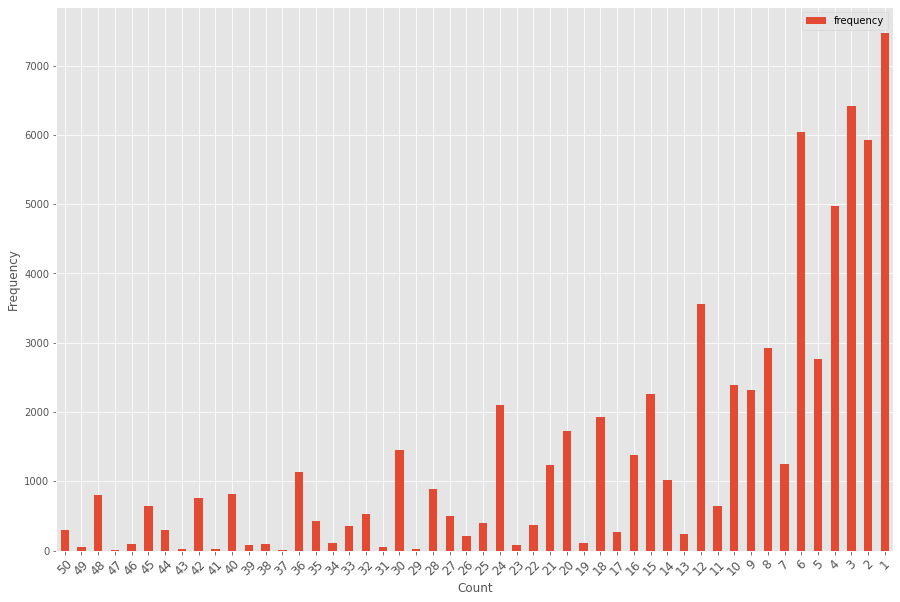

In [24]:
# freq_count.tail(50).sort_values('frequency',ascending=False).plot.bar()
freq_count.tail(50).plot.bar()
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

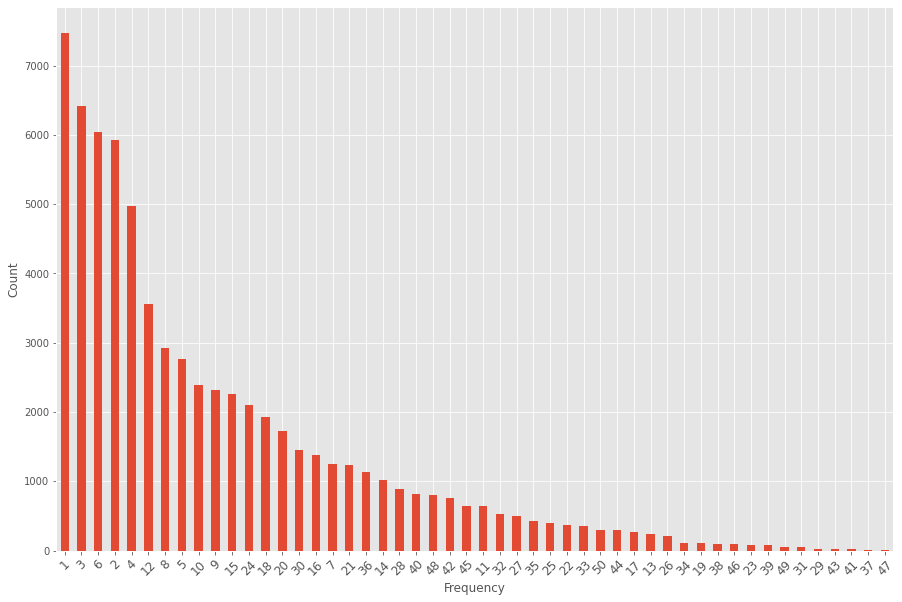

In [31]:
freq_count.tail(50).sort_values('frequency',ascending=False).plot.bar(legend=None)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [95]:
7*1500, 5*

10500

In [34]:
index = freq_count.tail(50).sort_values('frequency',ascending=False).index
print("Index: ",index)
print("Mean: ",np.mean(index))
print("Median: ", np.median(index))
print("Center position: ", index[len(index)//2])
print("a half of center position: ", index[len(index)//4])

Index:  Int64Index([ 1,  3,  6,  2,  4, 12,  8,  5, 10,  9, 15, 24, 18, 20, 30, 16,  7,
            21, 36, 14, 28, 40, 48, 42, 45, 11, 32, 27, 35, 25, 22, 33, 50, 44,
            17, 13, 26, 34, 19, 38, 46, 23, 39, 49, 31, 29, 43, 41, 37, 47],
           dtype='int64')
Mean:  25.5
Median:  25.5
Center position:  11
a half of center position:  18


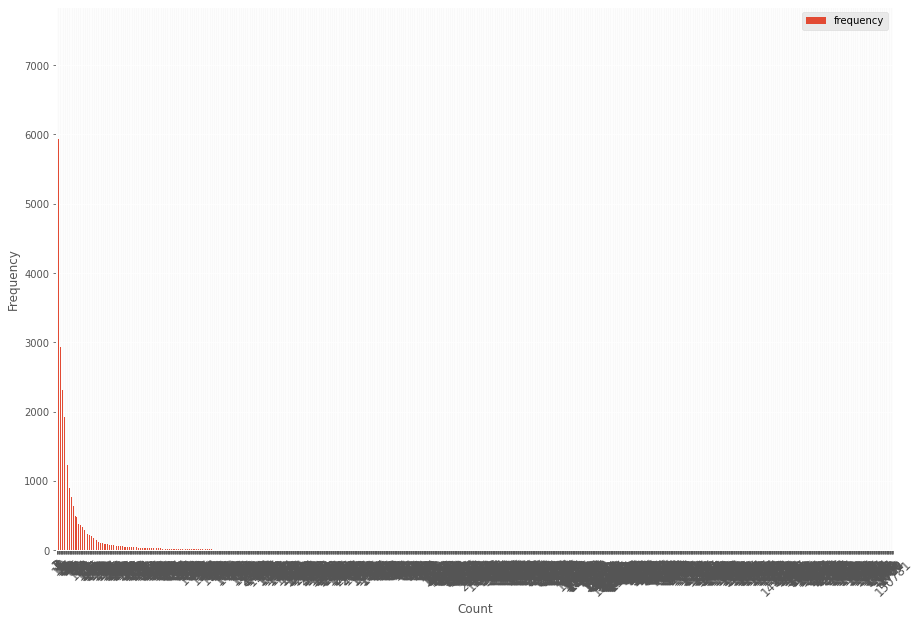

In [35]:
freq_count.sort_values('frequency',ascending=False).plot.bar()
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

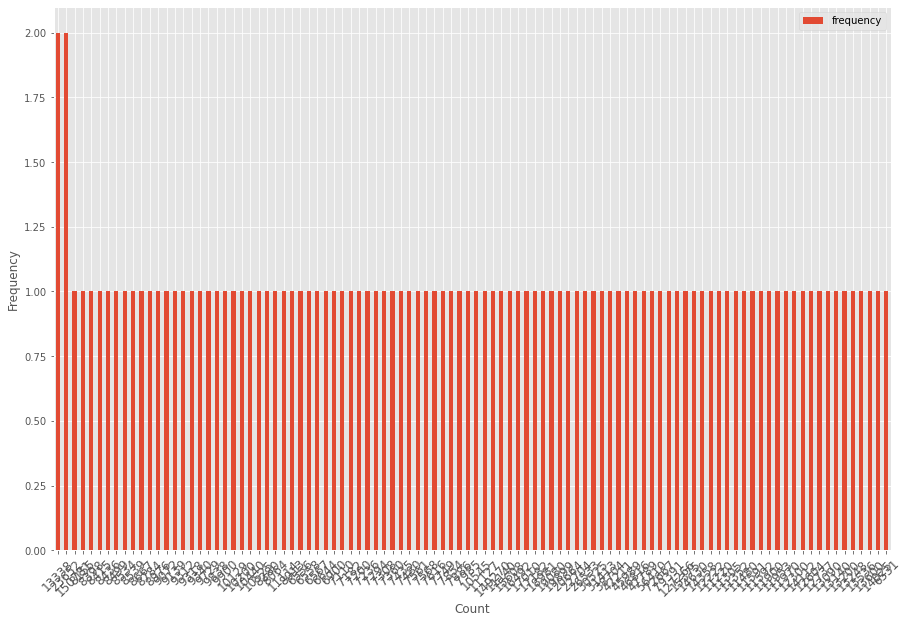

In [36]:
freq_count.head(100).sort_values('frequency',ascending=False).plot.bar()
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

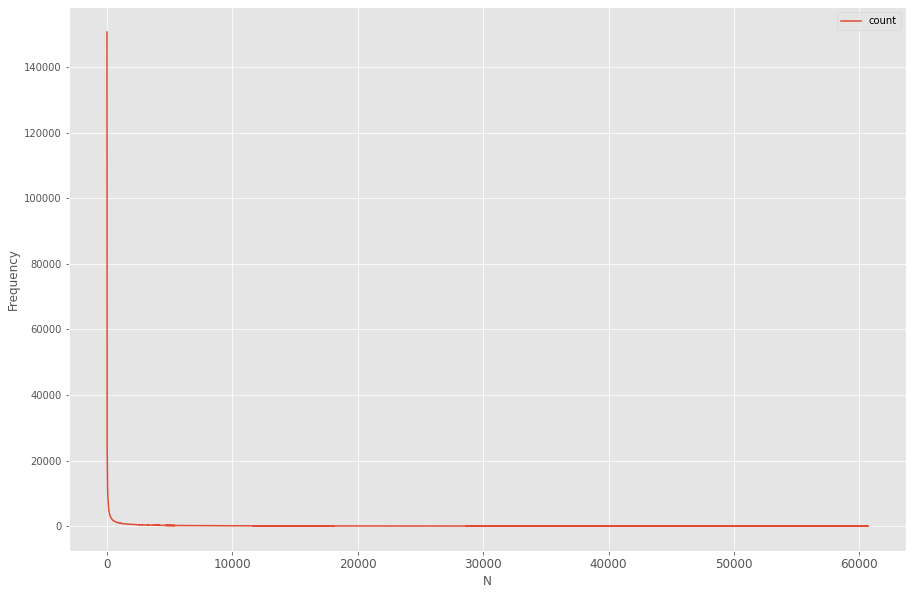

In [40]:
df_rm_noise = df[df['count']>=5]

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['xtick.labelsize'] = 12
df_rm_noise.sort_values(by=['count'],ascending=False).plot()
# plt.plot(300000,250/2)
plt.xlabel('N')
plt.ylabel('Frequency')
plt.show()

[]

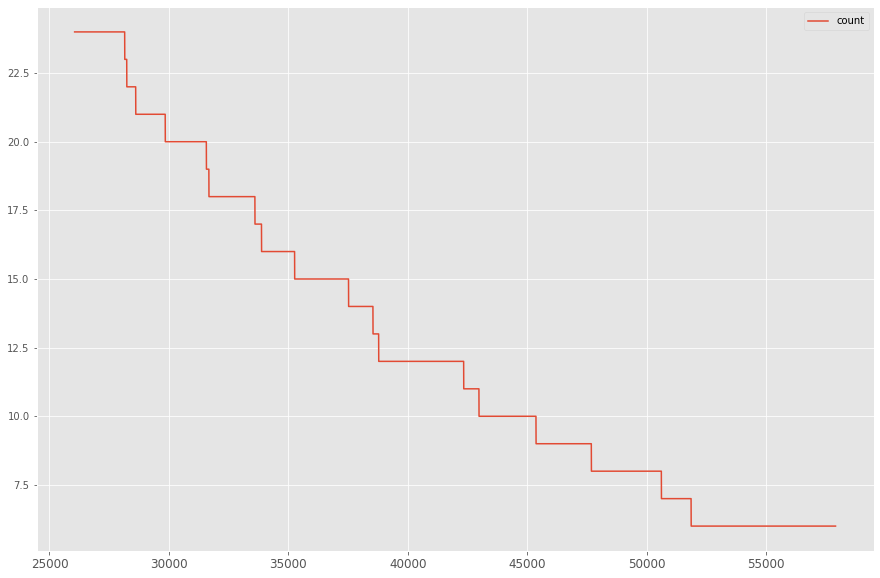

In [110]:
df_rm_noise.loc[(df_rm_noise['count']>5) & (df_rm_noise['count']<25)].plot()
plt.plot()
# anomaly in range(7,10)

In [111]:
df_rm_noise[(df_rm_noise['count']>=5) & (df_rm_noise['count']<8)]

,feature,count
50618,"(xa_lộ_hà_nội, trần_não, ngã_tư_hàng_xanh)",7
50619,"(thảo_điền, số_39, nam_kỳ_khởi_nghĩa)",7
50620,"(thảo_điền, trần_não, nam_kỳ_khởi_nghĩa)",7
50621,"(thảo_điền, empty, nam_kỳ_khởi_nghĩa)",7
50622,"(thảo_điền, ngã_tư_hàng_xanh, nam_kỳ_khởi_nghĩa)",7
...,...,...
60678,"(lý_thường_kiệt, pham_ngũ_lão, hẻm_35_phạm_ngũ...",5
60679,"(lý_thường_kiệt, hẻm_35_phạm_ngũ_lão, hẻm_309_...",5
60680,"(lý_thường_kiệt, quang_trung, quang_trung)",5
60681,"(lý_thường_kiệt, hà_huy_giáp, hà_huy_giáp)",5


In [112]:
#with count == 5 is anomaly
df[df['count']==5]

,feature,count
57911,"(xa_lộ_hà_nội, xa_lộ_hà_nội, d9)",5
57912,"(thảo_điền, số_39, d9)",5
57913,"(thảo_điền, trần_não, d9)",5
57914,"(thảo_điền, cầu_sài_gòn_1, ngã_tư_hàng_xanh)",5
57915,"(thảo_điền, cầu_sài_gòn_1, cầu_công_lý)",5
...,...,...
60678,"(lý_thường_kiệt, pham_ngũ_lão, hẻm_35_phạm_ngũ...",5
60679,"(lý_thường_kiệt, hẻm_35_phạm_ngũ_lão, hẻm_309_...",5
60680,"(lý_thường_kiệt, quang_trung, quang_trung)",5
60681,"(lý_thường_kiệt, hà_huy_giáp, hà_huy_giáp)",5


[]

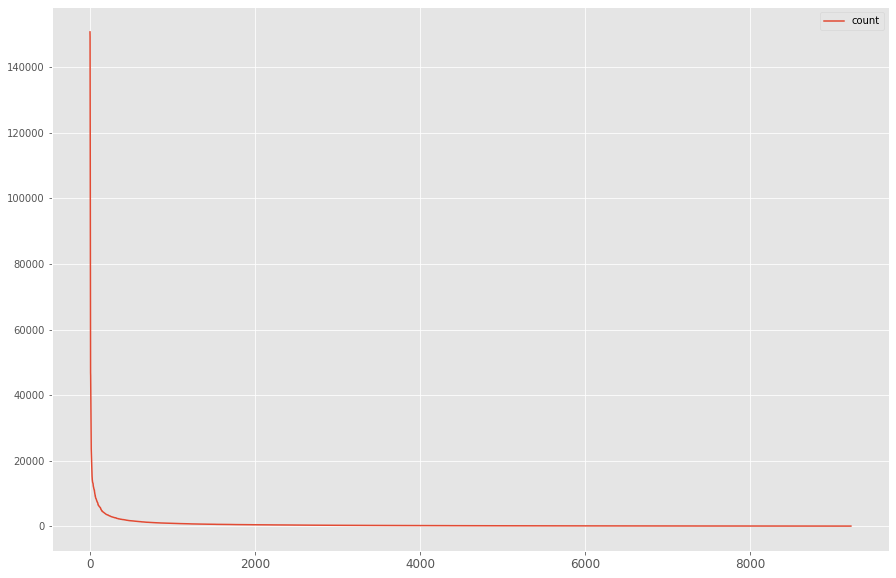

In [113]:
df_rm_noise[df_rm_noise['count']>100].plot()
plt.plot()

In [114]:
df_rm_noise[df_rm_noise['count']>300]

,feature,count
0,"(quốc_lộ_1, quốc_lộ_1, quốc_lộ_1)",150781
1,"(võ_văn_kiệt, võ_văn_kiệt, võ_văn_kiệt)",149270
2,"(võ_trần_chí, quốc_lộ_1, quốc_lộ_1)",127266
3,"(nguyễn_văn_linh, nguyễn_văn_linh, nguyễn_văn_...",79391
4,"(kinh_dương_vương, kinh_dương_vương, hồng_bàng)",72667
...,...,...
3421,"(empty, tạ_quang_bửu, cầu_chữ_y)",303
3422,"(trần_thị_ngôi, phạm_nhữ_tăng, phạm_nhữ_tăng)",302
3423,"(phạm_nhữ_tăng, empty, tạ_quang_bửu)",302
3424,"(hẻm_c7_phạm_hùng, tạ_quang_bửu, lê_lợi)",302


In [53]:
# top_selection = 300
# y = df_rm_noise['count'][df_rm_noise['count']>top_selection].tolist()
# x = df_rm_noise['count'][df_rm_noise['count']>top_selection].index.tolist()

y = df_rm_noise['count'].tolist()
x = df_rm_noise['count'].index.tolist()


upper_index = 20
upper_range = [upper_index,upper_index]

lower_index = 1000
lower_range = [lower_index,lower_index]
# df_rm_noise[df_rm_noise['count']>top_selection]
df_rm_noise

,feature,count
0,"(quốc_lộ_1, quốc_lộ_1, quốc_lộ_1)",150781
1,"(võ_văn_kiệt, võ_văn_kiệt, võ_văn_kiệt)",149270
2,"(võ_trần_chí, quốc_lộ_1, quốc_lộ_1)",127266
3,"(nguyễn_văn_linh, nguyễn_văn_linh, nguyễn_văn_...",79391
4,"(kinh_dương_vương, kinh_dương_vương, hồng_bàng)",72667
...,...,...
60678,"(lý_thường_kiệt, pham_ngũ_lão, hẻm_35_phạm_ngũ...",5
60679,"(lý_thường_kiệt, hẻm_35_phạm_ngũ_lão, hẻm_309_...",5
60680,"(lý_thường_kiệt, quang_trung, quang_trung)",5
60681,"(lý_thường_kiệt, hà_huy_giáp, hà_huy_giáp)",5


In [54]:
y

[150781,
 149270,
 127266,
 79391,
 72667,
 56410,
 47789,
 46816,
 45989,
 42211,
 38704,
 31413,
 30525,
 26533,
 23652,
 23652,
 22704,
 20664,
 19899,
 19080,
 18981,
 17182,
 17010,
 16492,
 15608,
 15375,
 14630,
 14358,
 14112,
 14025,
 13600,
 13536,
 13338,
 13338,
 13248,
 13200,
 13140,
 13090,
 12737,
 12604,
 12300,
 12222,
 11970,
 11953,
 11900,
 11592,
 11591,
 11480,
 11352,
 11305,
 11220,
 11140,
 11127,
 11114,
 10545,
 10525,
 10440,
 10200,
 10129,
 9900,
 9838,
 9729,
 9340,
 9318,
 9312,
 9139,
 9072,
 8976,
 8784,
 8667,
 8539,
 8534,
 8499,
 8436,
 8415,
 8398,
 8280,
 8155,
 8064,
 8013,
 7985,
 7886,
 7854,
 7749,
 7616,
 7568,
 7561,
 7480,
 7435,
 7360,
 7308,
 7294,
 7236,
 7200,
 7182,
 7110,
 6900,
 6644,
 6567,
 6558,
 6556,
 6531,
 6510,
 6384,
 6348,
 6348,
 6327,
 6272,
 6264,
 6160,
 6118,
 6076,
 6072,
 6048,
 6048,
 6000,
 5985,
 5982,
 5950,
 5913,
 5879,
 5865,
 5850,
 5796,
 5642,
 5642,
 5624,
 5616,
 5610,
 5600,
 5279,
 5248,
 5236,
 5208,


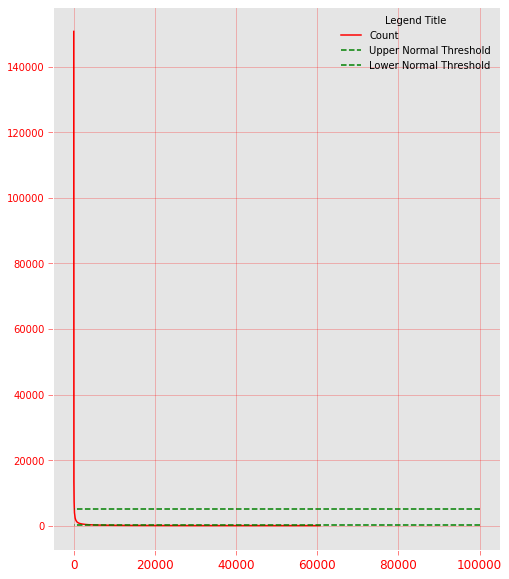

In [62]:
fig, ax = plt.subplots(1, figsize=(8, 10))
thres_normal = 5000
thres_abnormal = 14


ax.plot(x,y,color='red', label='Count')
# ax.plot(upper_range, [1e5,1], '--', color='blue', label="Upper Range", alpha=0.35)
# ax.plot(lower_range, [1e5,1], '--', color='green', label="Lower Range", alpha=0.4)
ax.plot([1e5,1], [thres_normal,thres_normal], '--', color='green', label="Upper Normal Threshold")
ax.plot([1e5,1], [100,100], '--', color='green', label="Lower Normal Threshold")

# ax.plot([1e5,1], [10,15], '--', color='blue', label="Abnormal Threshold", alpha=0.5)
ax.tick_params(direction='out', length=5, width=0.5, colors='r',grid_color='r', grid_alpha=0.3)
# # Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", title="Legend Title", frameon=False)

plt.show()

In [61]:
thres_normal = 100
normal_df = df_rm_noise[df_rm_noise['count']>=thres_normal]
abnormal_df = df_rm_noise[(df_rm_noise['count']>10) & (df_rm_noise['count']<15)]
print("Normal: ",normal_df.shape[0])
print("Abnormal: ",abnormal_df.shape[0])
print("Total: ",normal_df.shape[0]+abnormal_df.shape[0])

Normal:  9400
Abnormal:  5460
Total:  14860


In [312]:
normal_df

,feature,count
0,"(quốc_lộ_1, quốc_lộ_1, quốc_lộ_1)",150781
1,"(võ_văn_kiệt, võ_văn_kiệt, võ_văn_kiệt)",149270
2,"(võ_trần_chí, quốc_lộ_1, quốc_lộ_1)",127266
3,"(nguyễn_văn_linh, nguyễn_văn_linh, nguyễn_văn_...",79391
4,"(kinh_dương_vương, kinh_dương_vương, hồng_bàng)",72667
...,...,...
9395,"(an_dương_vương, phan_văn_trị, nguyễn_biểu)",100
9396,"(an_dương_vương, nguyễn_biểu, dạ_nam)",100
9397,"(bắc_hải, thành_thái, hẻm_58_thành_thái)",100
9398,"(bắc_hải, hẻm_449_sư_vạn_hạnh, thành_thái)",100


In [313]:
abnormal_df

,feature,count
37521,"(xa_lộ_hà_nội, thảo_điền, nam_kỳ_khởi_nghĩa)",14
37522,"(xa_lộ_hà_nội, số_39, nam_kỳ_khởi_nghĩa)",14
37523,"(xa_lộ_hà_nội, trần_não, nam_kỳ_khởi_nghĩa)",14
37524,"(xa_lộ_hà_nội, empty, nam_kỳ_khởi_nghĩa)",14
37525,"(xa_lộ_hà_nội, ngã_tư_hàng_xanh, nam_kỳ_khởi_n...",14
...,...,...
42976,"(hoàng_văn_thụ, nguyễn_kiệm, hẻm_309_nguyễn_oanh)",11
42977,"(hoàng_văn_thụ, pham_ngũ_lão, hẻm_35_phạm_ngũ_...",11
42978,"(hoàng_văn_thụ, hẻm_35_phạm_ngũ_lão, hẻm_309_n...",11
42979,"(hoàng_văn_thụ, quang_trung, quang_trung)",11


# Assign label

In [322]:
df

,feature,count
0,"(quốc_lộ_1, quốc_lộ_1, quốc_lộ_1)",150781
1,"(võ_văn_kiệt, võ_văn_kiệt, võ_văn_kiệt)",149270
2,"(võ_trần_chí, quốc_lộ_1, quốc_lộ_1)",127266
3,"(nguyễn_văn_linh, nguyễn_văn_linh, nguyễn_văn_...",79391
4,"(kinh_dương_vương, kinh_dương_vương, hồng_bàng)",72667
...,...,...
85461,"(hẻm_35_phạm_ngũ_lão, pham_ngũ_lão, pham_ngũ_lão)",1
85462,"(hẻm_35_phạm_ngũ_lão, quang_trung, quang_trung)",1
85463,"(hẻm_35_phạm_ngũ_lão, hà_huy_giáp, hà_huy_giáp)",1
85464,"(quang_trung, quang_trung, hẻm_309_nguyễn_oanh)",1


In [323]:
raw_data

,vehicle_id,p_start,p_temp,p_end,routes
0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Thảo Điền]"
1,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8014)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Đướng Song Hành X..."
2,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73700000000001, 10.8012)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Đướng Song Hành X..."
3,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8022)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Nguyễn Bá Lân]"
4,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8027)","[Xa Lộ Hà Nội, Xa Lộ Hà Nội, Nguyễn Bá Lân]"
...,...,...,...,...,...
7276495,100000533,"(106.679, 10.8486)","(106.679, 10.8515)","(106.679, 10.8532)","[Đường Nguyễn Oanh, Hà Huy Giáp, Hà Huy Giáp]"
7276496,100000533,"(106.679, 10.8488)","(106.679, 10.8502)","(106.679, 10.8515)","[Đường Nguyễn Oanh, Đường Nguyễn Oanh, Hà Huy ..."
7276497,100000533,"(106.679, 10.8488)","(106.679, 10.8502)","(106.679, 10.8532)","[Đường Nguyễn Oanh, Đường Nguyễn Oanh, Hà Huy ..."
7276498,100000533,"(106.679, 10.8488)","(106.679, 10.8515)","(106.679, 10.8532)","[Đường Nguyễn Oanh, Hà Huy Giáp, Hà Huy Giáp]"


In [327]:
df_rm_noise = df[df['count']>=5]
X = raw_data.copy()
X['pre_routes'] = X['routes'].apply(lambda street: tuple(preprocess_street(street)))

In [329]:
X = X.drop_duplicates('pre_routes').drop(columns=['routes'])
X

,vehicle_id,p_start,p_temp,p_end,pre_routes
0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","(xa_lộ_hà_nội, xa_lộ_hà_nội, thảo_điền)"
1,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8014)","(xa_lộ_hà_nội, xa_lộ_hà_nội, song_hành_xa_lộ_h..."
3,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8022)","(xa_lộ_hà_nội, xa_lộ_hà_nội, nguyễn_bá_lân)"
5,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8026)","(xa_lộ_hà_nội, xa_lộ_hà_nội, nguyễn_duy_hiệu)"
9,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.734, 10.8034)","(xa_lộ_hà_nội, xa_lộ_hà_nội, số_39)"
...,...,...,...,...,...
7274691,100000533,"(106.679, 10.8284)","(106.677, 10.8429)","(106.679, 10.8515)","(nguyễn_oanh, hẻm_309_nguyễn_oanh, hà_huy_giáp)"
7274728,100000533,"(106.679, 10.8284)","(106.679, 10.8515)","(106.679, 10.8532)","(nguyễn_oanh, hà_huy_giáp, hà_huy_giáp)"
7276380,100000533,"(106.677, 10.8429)","(106.677, 10.8432)","(106.678, 10.8446)","(hẻm_309_nguyễn_oanh, nguyễn_oanh, nguyễn_oanh)"
7276386,100000533,"(106.677, 10.8429)","(106.677, 10.8432)","(106.679, 10.8515)","(hẻm_309_nguyễn_oanh, nguyễn_oanh, hà_huy_giáp)"


In [331]:
df.shape, X.shape

((85466, 2), (85467, 5))

In [332]:
def find_freq_of_route(x, df_freq):
    return df[df['feature']==x]['count'].tolist()[0]

X['freq'] = X['pre_routes'].apply(lambda street: find_freq_of_route(street,df))

In [333]:
X

,vehicle_id,p_start,p_temp,p_end,pre_routes,freq
0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","(xa_lộ_hà_nội, xa_lộ_hà_nội, thảo_điền)",121
1,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8014)","(xa_lộ_hà_nội, xa_lộ_hà_nội, song_hành_xa_lộ_h...",2
3,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8022)","(xa_lộ_hà_nội, xa_lộ_hà_nội, nguyễn_bá_lân)",2
5,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8026)","(xa_lộ_hà_nội, xa_lộ_hà_nội, nguyễn_duy_hiệu)",84
9,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.734, 10.8034)","(xa_lộ_hà_nội, xa_lộ_hà_nội, số_39)",31
...,...,...,...,...,...,...
7274691,100000533,"(106.679, 10.8284)","(106.677, 10.8429)","(106.679, 10.8515)","(nguyễn_oanh, hẻm_309_nguyễn_oanh, hà_huy_giáp)",28
7274728,100000533,"(106.679, 10.8284)","(106.679, 10.8515)","(106.679, 10.8532)","(nguyễn_oanh, hà_huy_giáp, hà_huy_giáp)",21
7276380,100000533,"(106.677, 10.8429)","(106.677, 10.8432)","(106.678, 10.8446)","(hẻm_309_nguyễn_oanh, nguyễn_oanh, nguyễn_oanh)",21
7276386,100000533,"(106.677, 10.8429)","(106.677, 10.8432)","(106.679, 10.8515)","(hẻm_309_nguyễn_oanh, nguyễn_oanh, hà_huy_giáp)",14


In [334]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85467 entries, 0 to 7276415
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   vehicle_id  85467 non-null  int64 
 1   p_start     85467 non-null  object
 2   p_temp      85467 non-null  object
 3   p_end       85467 non-null  object
 4   pre_routes  85467 non-null  object
 5   freq        85467 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


In [335]:
# X.to_csv('../dataset/raw_bo3.csv', encoding='utf-8-sig')

In [4]:
data = pd.read_csv('../dataset/raw_bo3.csv', encoding='utf-8-sig',index_col=0)
data

,vehicle_id,p_start,p_temp,p_end,pre_routes,freq
0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền')",121
1,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8014)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'song_hành_xa...",2
3,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8022)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nguyễn_bá_lân')",2
5,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.736, 10.8026)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nguyễn_duy_h...",84
9,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.734, 10.8034)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'số_39')",31
...,...,...,...,...,...,...
7274691,100000533,"(106.679, 10.8284)","(106.677, 10.8429)","(106.679, 10.8515)","('nguyễn_oanh', 'hẻm_309_nguyễn_oanh', 'hà_huy...",28
7274728,100000533,"(106.679, 10.8284)","(106.679, 10.8515)","(106.679, 10.8532)","('nguyễn_oanh', 'hà_huy_giáp', 'hà_huy_giáp')",21
7276380,100000533,"(106.677, 10.8429)","(106.677, 10.8432)","(106.678, 10.8446)","('hẻm_309_nguyễn_oanh', 'nguyễn_oanh', 'nguyễn...",21
7276386,100000533,"(106.677, 10.8429)","(106.677, 10.8432)","(106.679, 10.8515)","('hẻm_309_nguyễn_oanh', 'nguyễn_oanh', 'hà_huy...",14


In [65]:
normal_df = data[data['freq']>=100]
abnormal_df = data[(data['freq']>10) & (data['freq']<15)]

In [66]:
normal_df.shape, abnormal_df.shape

((9401, 6), (5460, 6))

In [67]:
abnormal_df['label']=True
normal_df['label']=False

<ipython-input-67-2b6ea3b23927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnormal_df['label']=True
<ipython-input-67-2b6ea3b23927>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_df['label']=False


In [68]:
abnormal_df

,vehicle_id,p_start,p_temp,p_end,pre_routes,freq,label
28,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.711, 10.8015)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'ngã_tư_hàng_...",11,True
147,100000025,"(106.74, 10.8014)","(106.738, 10.8012)","(106.68799999999999, 10.7858)","('xa_lộ_hà_nội', 'thảo_điền', 'nam_kỳ_khởi_ngh...",14,True
268,100000025,"(106.74, 10.8014)","(106.738, 10.8014)","(106.61200000000001, 10.8196)","('xa_lộ_hà_nội', 'song_hành_xa_lộ_hà_nội', 'm14')",12,True
457,100000025,"(106.74, 10.8014)","(106.736, 10.8022)","(106.61200000000001, 10.8196)","('xa_lộ_hà_nội', 'nguyễn_bá_lân', 'm14')",12,True
975,100000025,"(106.74, 10.8014)","(106.734, 10.8034)","(106.68799999999999, 10.7858)","('xa_lộ_hà_nội', 'số_39', 'nam_kỳ_khởi_nghĩa')",14,True
...,...,...,...,...,...,...,...
7272177,100000533,"(106.682, 10.822000000000001)","(106.679, 10.8284)","(106.677, 10.8429)","('nguyễn_kiệm', 'nguyễn_oanh', 'hẻm_309_nguyễn...",14,True
7272544,100000533,"(106.682, 10.8224)","(106.68, 10.8272)","(106.679, 10.8515)","('pham_ngũ_lão', 'quang_trung', 'hà_huy_giáp')",12,True
7272961,100000533,"(106.682, 10.8237)","(106.679, 10.8284)","(106.677, 10.8429)","('hẻm_35_phạm_ngũ_lão', 'nguyễn_oanh', 'hẻm_30...",14,True
7274155,100000533,"(106.68, 10.8272)","(106.677, 10.8429)","(106.677, 10.8432)","('quang_trung', 'hẻm_309_nguyễn_oanh', 'nguyễn...",14,True


In [69]:
normal_df

,vehicle_id,p_start,p_temp,p_end,pre_routes,freq,label
0,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.738, 10.8012)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'thảo_điền')",121,False
16,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.73100000000001, 10.7996)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'cầu_sài_gòn_1')",305,False
21,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.721, 10.7981)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'điện_biên_phủ')",522,False
40,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.695, 10.7912)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'võ_thị_sáu')",250,False
50,100000025,"(106.74, 10.8014)","(106.73899999999999, 10.8012)","(106.68799999999999, 10.7858)","('xa_lộ_hà_nội', 'xa_lộ_hà_nội', 'nam_kỳ_khởi_...",127,False
...,...,...,...,...,...,...,...
7272522,100000533,"(106.682, 10.8224)","(106.68, 10.8272)","(106.679, 10.8284)","('pham_ngũ_lão', 'quang_trung', 'nguyễn_oanh')",126,False
7272570,100000533,"(106.682, 10.8224)","(106.679, 10.8284)","(106.678, 10.8297)","('pham_ngũ_lão', 'nguyễn_oanh', 'nguyễn_oanh')",630,False
7272591,100000533,"(106.682, 10.8224)","(106.679, 10.8284)","(106.679, 10.8515)","('pham_ngũ_lão', 'nguyễn_oanh', 'hà_huy_giáp')",126,False
7272948,100000533,"(106.682, 10.8237)","(106.679, 10.8284)","(106.678, 10.8297)","('hẻm_35_phạm_ngũ_lão', 'nguyễn_oanh', 'nguyễn...",210,False


In [72]:
X = normal_df.copy()
X = X.append(abnormal_df) 

In [74]:
# X.to_csv('../dataset/clean_bo3.csv', encoding='utf-8-sig')